### Код к 12 задаче
**ТЗ:** *Решение однородного ДУ 2го порядка с переменными коэффициентами через разложение второй производной в разность + РК4*

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Дифференциальное уравнение второго порядка


$$
a_2(x) y'' + a_1(x) y' + a_0(x) y = 0
$$

Начальные условия:

$$
\begin{cases}
y_1 = y \\
y_2 = y'
\end{cases}
$$

По разностной схеме имеем:
$$
y'_n = -\frac{a_1(x) y_n + a_0(x) y'_{n-1}}{a_2(x)}
$$


In [50]:
a2 = lambda x: 5 #y"
a1 = lambda x: 6 #y'
a0 = lambda x: 7  #y

In [51]:
def f(x, y, yp):
    return (-a1(x) * yp + a0(x) * y) / a2(x)

In [52]:
def runge_kutta_4(f, a2, a1, a0, x0, y0, yp0, dx, n) -> np.ndarray:
    """
    Runge-Kutta
    :param f: функция вычисление второй производной
    :param a2: коэффициент при y"
    :param a1: коэффициент при y'
    :param a0: коэффициент при y
    :param x0: начальный x
    :param y0: начальный y
    :param yp0: первая производная y
    :param dx: шаг интегрирования
    :param n: кол-во шагов
    :return: numpy.ndarray [x, y, y'] на каждом шаге
    """
    F = np.zeros((n, 3))
    F[0] = [x0, y0, yp0]

    for i in range(1, n):
        x, y, yp = F[i - 1]

        k1 = dx * yp
        l1 = dx * f(x, y, yp)

        k2 = dx * (yp + 0.5 * l1)
        l2 = dx * f(x + 0.5 * dx, y + 0.5 * k1, yp + 0.5 * l1)

        k3 = dx * (yp + 0.5 * l2)
        l3 = dx * f(x + 0.5 * dx, y + 0.5 * k2, yp + 0.5 * l2)

        k4 = dx * (yp + l3)
        l4 = dx * f(x + dx, y + k3, yp + l3)

        y_next = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        yp_next = yp + (l1 + 2 * l2 + 2 * l3 + l4) / 6

        F[i] = [x + dx, y_next, yp_next]

    return F

In [53]:
x_0, y_0, yp_0 = 0, 1, 5 / 6
dx, n = 1e-2, 3000

F = runge_kutta_4(f, a2, a1, a0, x_0, y_0, yp_0, dx, n)

In [54]:
def exact_solution(t, y) -> list:
    """
    Compute the exact solution
    :param t: текущий x
    :param y: текущие [y, y']
    :return: [y', y"]
    """
    return [y[1], f(t, y[0], y[1])]

In [55]:
y_init = [y_0, yp_0]
sol = solve_ivp(exact_solution, [x_0, dx * (n - 1)], y_init, t_eval=np.arange(x_0, dx * n, dx))

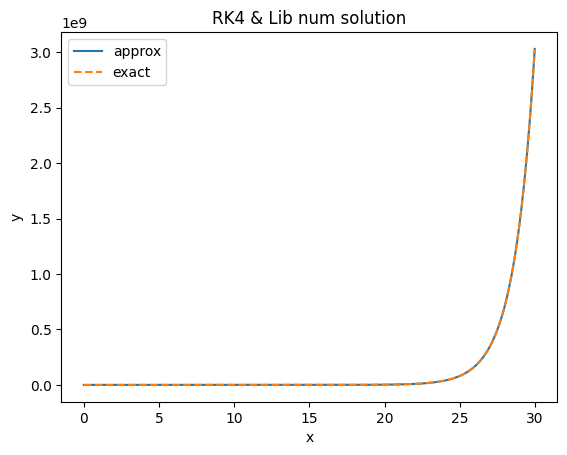

In [56]:
plt.plot(F[:, 0], F[:, 1], label='approx')
plt.plot(sol.t, sol.y[0], label='exact', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('RK4 & Lib num solution')
plt.show()